In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [4]:
df = pd.read_json('data.json')

In [5]:
df.shape

(797565, 7)

In [6]:
df.head

<bound method NDFrame.head of         station_id  available_bikes  temp  rain  wind  day  hour
0                1               26     9     0    24    4     9
1                1               27    10     0    23    4    10
2                1               26    10     0    23    4    10
3                1               26    10     0    23    4    10
4                1               27    10     0    23    4    10
...            ...              ...   ...   ...   ...  ...   ...
797560         117                5     7     0    16    2     2
797561         117                5     7     0    16    2     2
797562         117                5     7     0    16    2     2
797563         117                5     7     0    16    2     2
797564         117                5     7     0    16    2     2

[797565 rows x 7 columns]>

I want to see if any of the time or weather features we chose heavily correlates wiith the number of avaialbe bikes.

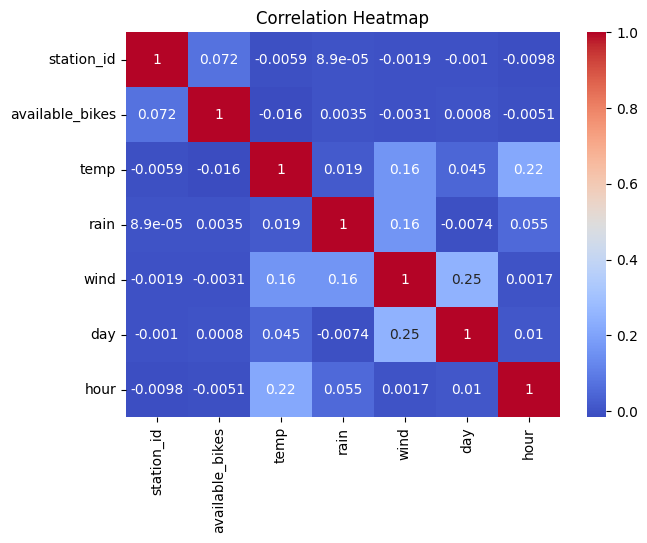

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

As I suspected, of the weather variables, the temperature correlates most closely with fluctuating bike numbers, as I imagine people ride more when it's warm and less when it's cold. Wind, rain, and temp also all correlate very strongly with each other as they are affected by the same overall weather conditions. Interestingly day correlates the least with the bike availability meaning that there is not a noticeable change depending on whether its the weekend or not.

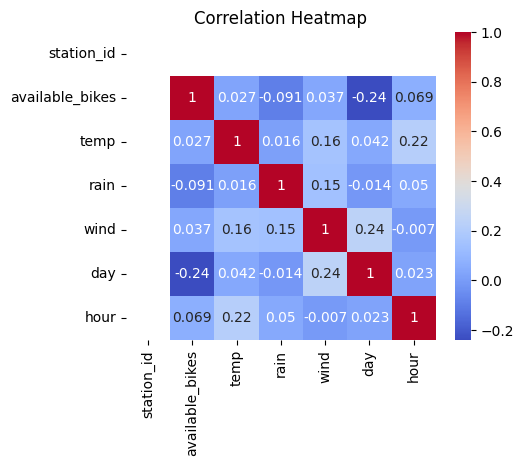

In [21]:
df1 = df[df["station_id"] == 1]
correlation_matrix = df1.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

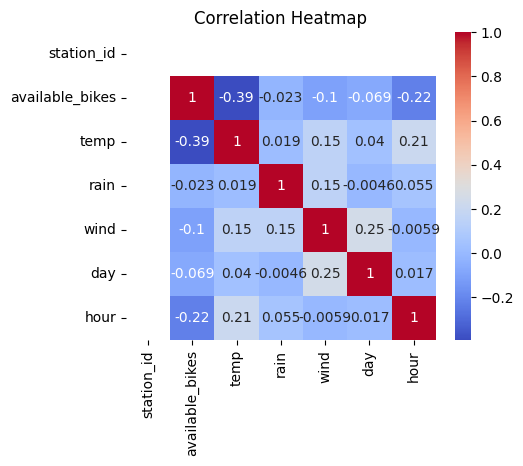

In [22]:
df50 = df[df["station_id"] == 50]
correlation_matrix = df50.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

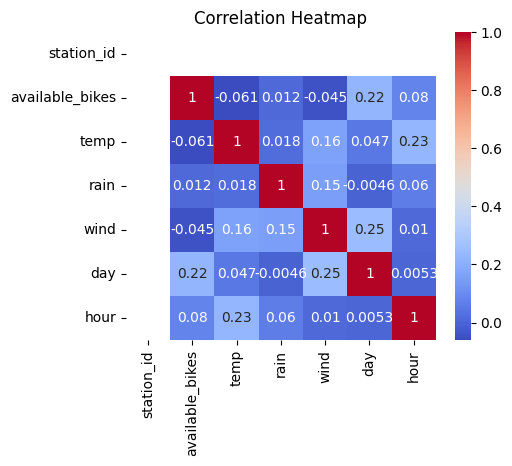

In [23]:
df100 = df[df["station_id"] == 100]
correlation_matrix = df100.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Function for checking the r squared value.

In [8]:
def r_squared(y_val, pred_y_val):
    SST = np.sum(np.square(y_val - np.mean(y_val)))
    SSE = np.sum(np.square(y_val - pred_y_val))
    return 1 - (SSE / SST)

In [26]:
stand_dfs = []

In [27]:
for i in range(1,118):
    df_stand = df[df["station_id"] == i]
    stand_dfs.append(df_stand)
    

Linear Regression

In [28]:
r = []
for i in range(len(stand_dfs)):
    if (stand_dfs[i].empty):
        continue
    df_current = stand_dfs[i]
    train_set = df_current.sample(frac=0.7, random_state=42)
    test_set = df_current.drop(train_set.index)
       
    model = LinearRegression()
    x = train_set[['day', 'hour', 'temp', 'rain', 'wind']]  # Independent variable(s)
    y = train_set['available_bikes']    # Dependent variable
    model.fit(x, y)
    
    test_x = test_set[['day', 'hour', 'temp', 'rain', 'wind']]
    test_y = test_set['available_bikes']
    predictions = model.predict(test_x)
    
    r.append(r_squared(test_y, predictions))
print("Accuracy:")
print("max: ", max(r) * 100, "%")
print("min: ", min(r) * 100, "%")
print("avg: ", np.mean(r) * 100, "%")

Accuracy:
max:  37.16010776806772 %
min:  -0.23668417210498394 %
avg:  9.784703395598134 %


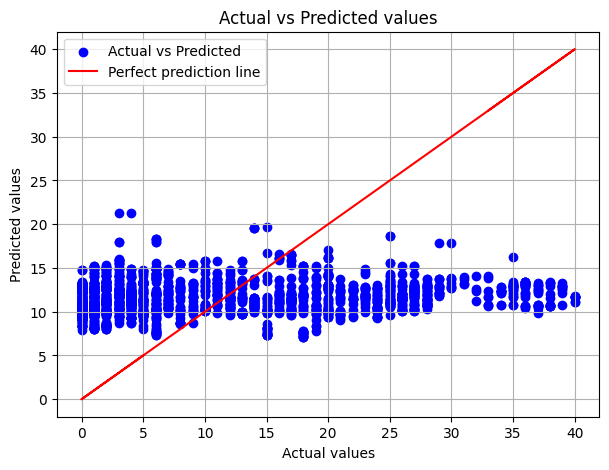

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y, predictions, color='blue', label='Actual vs Predicted')
plt.plot(test_y, test_y, color='red', label='Perfect prediction line')  # Perfect prediction line
plt.title('Actual vs Predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.grid(True)
plt.show()

Random Forest

In [12]:
r = []
for i in range(len(stand_dfs)):
    if (stand_dfs[i].empty):
        continue
    df_current = stand_dfs[i]
    train_set = df_current.sample(frac=0.7, random_state=42)
    test_set = df_current.drop(train_set.index)
       
    model = RandomForestRegressor()
    x = train_set[['day', 'hour', 'temp', 'rain', 'wind']]  # Independent variable(s)
    y = train_set['available_bikes']    # Dependent variable
    model.fit(x, y)
    
    test_x = test_set[['day', 'hour', 'temp', 'rain', 'wind']]
    test_y = test_set['available_bikes']
    predictions = model.predict(test_x)
    
    r.append(r_squared(test_y, predictions))
print("Accuracy:")
print("max: ", max(r) * 100, "%")
print("min: ", min(r) * 100, "%")
print("avg: ", np.mean(r) * 100, "%")

Accuracy:
max:  98.96690635729172 %
min:  80.59776590599131 %
avg:  95.66690139829429 %


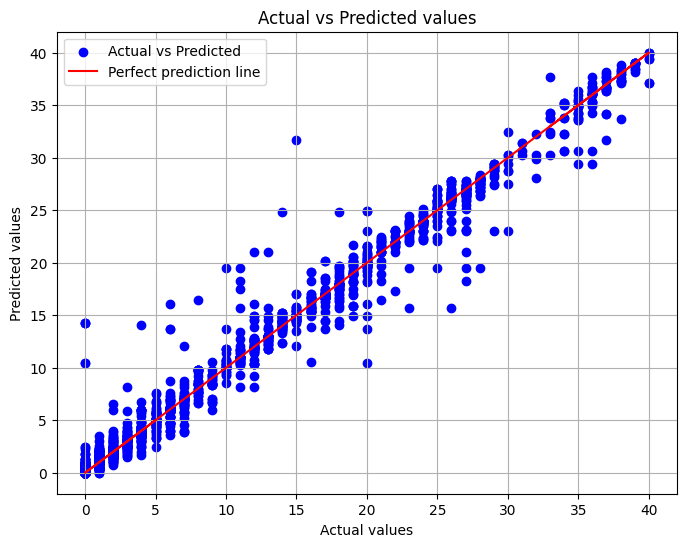

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y, predictions, color='blue', label='Actual vs Predicted')
plt.plot(test_y, test_y, color='red', label='Perfect prediction line')  # Perfect prediction line
plt.title('Actual vs Predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.grid(True)
plt.show()

KNN



2 neighbors

In [18]:
r = []
for i in range(len(stand_dfs)):
    if (stand_dfs[i].empty):
        continue
    df_current = stand_dfs[i]
    
    train_set = df_current.sample(frac=0.7, random_state=42)
    test_set = df_current.drop(train_set.index)
       
    model = KNeighborsClassifier(n_neighbors=2)
    x = train_set[['day', 'hour', 'temp', 'rain', 'wind']]  # Independent variable(s)
    y = train_set['available_bikes']    # Dependent variable
    model.fit(x, y)
    
    test_x = test_set[['day', 'hour', 'temp', 'rain', 'wind']]
    test_y = test_set['available_bikes']
    predictions = model.predict(test_x)
    
    r.append(r_squared(test_y, predictions))
print("Accuracy:")
print("max: ", max(r) * 100, "%")
print("min: ", min(r) * 100, "%")
print("avg: ", np.mean(r) * 100, "%")

Accuracy:
max:  98.18905053128137 %
min:  63.76635417314128 %
avg:  92.43356247789089 %


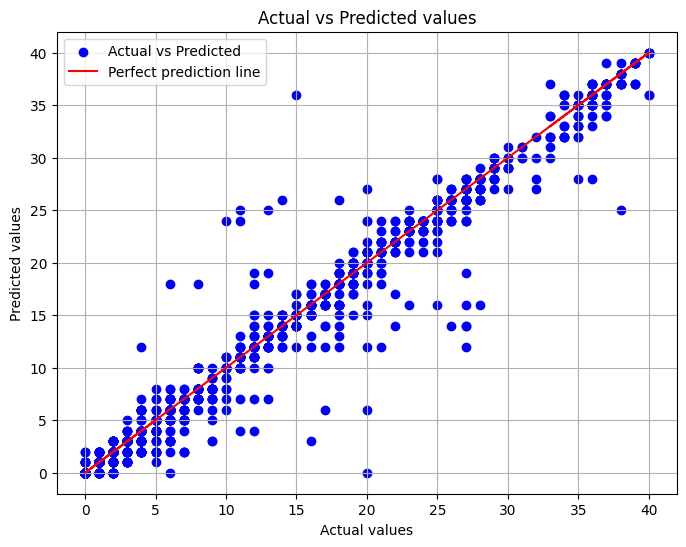

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y, predictions, color='blue', label='Actual vs Predicted')
plt.plot(test_y, test_y, color='red', label='Perfect prediction line')  # Perfect prediction line
plt.title('Actual vs Predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.grid(True)
plt.show()

5 neighbors

In [14]:
r = []
for i in range(len(stand_dfs)):
    if (stand_dfs[i].empty):
        continue
    df_current = stand_dfs[i]
    
    train_set = df_current.sample(frac=0.7, random_state=42)
    test_set = df_current.drop(train_set.index)
       
    model = KNeighborsClassifier(n_neighbors=5)
    x = train_set[['day', 'hour', 'temp', 'rain', 'wind']]  # Independent variable(s)
    y = train_set['available_bikes']    # Dependent variable
    model.fit(x, y)
    
    test_x = test_set[['day', 'hour', 'temp', 'rain', 'wind']]
    test_y = test_set['available_bikes']
    predictions = model.predict(test_x)
    
    r.append(r_squared(test_y, predictions))
print("Accuracy:")
print("max: ", max(r) * 100, "%")
print("min: ", min(r) * 100, "%")
print("avg: ", np.mean(r) * 100, "%")

Accuracy:
max:  95.16961840234195 %
min:  56.96998390047234 %
avg:  87.87045188096393 %


10 neighbors

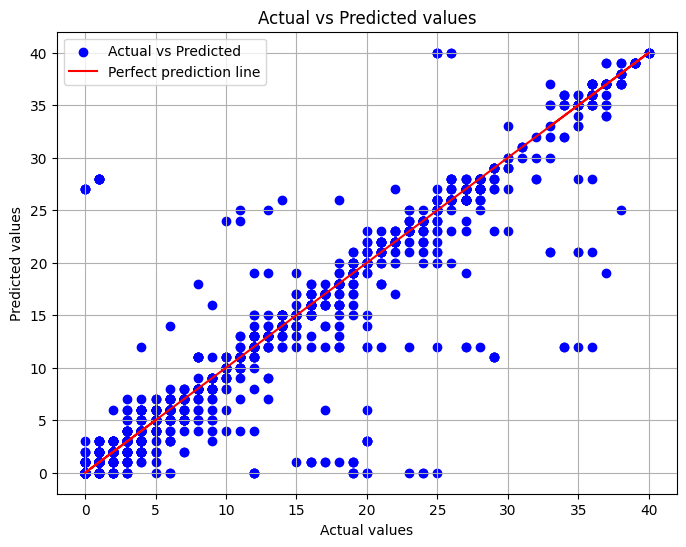

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y, predictions, color='blue', label='Actual vs Predicted')
plt.plot(test_y, test_y, color='red', label='Perfect prediction line')  # Perfect prediction line
plt.title('Actual vs Predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
r = []
for i in range(len(stand_dfs)):
    if (stand_dfs[i].empty):
        continue
    df_current = stand_dfs[i]
    
    train_set = df_current.sample(frac=0.7, random_state=42)
    test_set = df_current.drop(train_set.index)
       
    model = KNeighborsClassifier(n_neighbors=10)
    x = train_set[['day', 'hour', 'temp', 'rain', 'wind']]  # Independent variable(s)
    y = train_set['available_bikes']    # Dependent variable
    model.fit(x, y)
    
    test_x = test_set[['day', 'hour', 'temp', 'rain', 'wind']]
    test_y = test_set['available_bikes']
    predictions = model.predict(test_x)
    
    r.append(r_squared(test_y, predictions))
print("Accuracy:")
print("max: ", max(r) * 100, "%")
print("min: ", min(r) * 100, "%")
print("avg: ", np.mean(r) * 100, "%")

Accuracy:
max:  81.70410073710492 %
min:  33.66335229107311 %
avg:  63.23869893471884 %


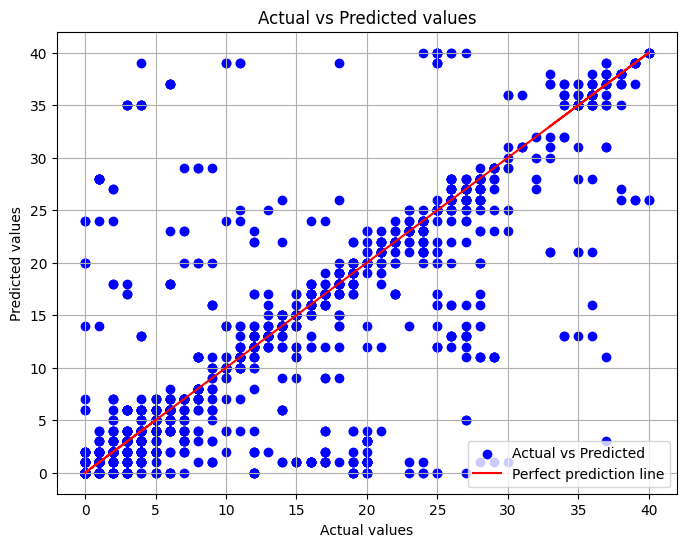

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y, predictions, color='blue', label='Actual vs Predicted')
plt.plot(test_y, test_y, color='red', label='Perfect prediction line')  # Perfect prediction line
plt.title('Actual vs Predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.grid(True)
plt.show()

Random Forest performed the best whe neach station had an individual model, so were going to train our models on that.

In [36]:
models= []
for i in range(len(stand_dfs)):
    if (stand_dfs[i].empty):
        continue
    df_current = stand_dfs[i]
    model = RandomForestRegressor()
    x = df_current[['day', 'hour', 'temp', 'rain', 'wind']]  # Independent variable(s)
    y = df_current['available_bikes']    # Dependent variable
    model.fit(x, y)
    
    models.append(model)

create Pickle files for app



In [38]:
folder_path = '../model_files'
for i, model in enumerate(models):
    filename = os.path.join(folder_path, f'model_{i}.pkl')
    with open(filename, 'wb') as file:
        pickle.dump(model, file)